## 0. Import

In [17]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
hf_df=pd.read_csv('hf_df.csv')
hf_df.drop(columns='Unnamed: 0',inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(hf_df.drop(columns='DEATH_EVENT'), 
                                                    hf_df.DEATH_EVENT, test_size=0.3, 
                                                    random_state=10)

In [5]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
286,90.0,1,337,0,38,0,390000.00,0.90,144,0,0
234,70.0,0,232,0,30,0,173000.00,1.20,132,1,0
20,68.0,1,220,0,35,1,289000.00,0.90,140,1,1
38,70.0,0,582,0,20,1,263358.03,1.83,134,1,1
271,60.0,1,257,1,30,0,150000.00,1.00,137,1,1
...,...,...,...,...,...,...,...,...,...,...,...
156,85.0,1,910,0,50,0,235000.00,1.30,134,1,0
123,43.0,1,358,0,50,0,237000.00,1.30,135,0,0
15,87.0,1,149,0,38,0,262000.00,0.90,140,1,0
125,58.0,1,200,1,60,0,300000.00,0.80,137,0,0


## 1. Entropy Model: No Max Depth

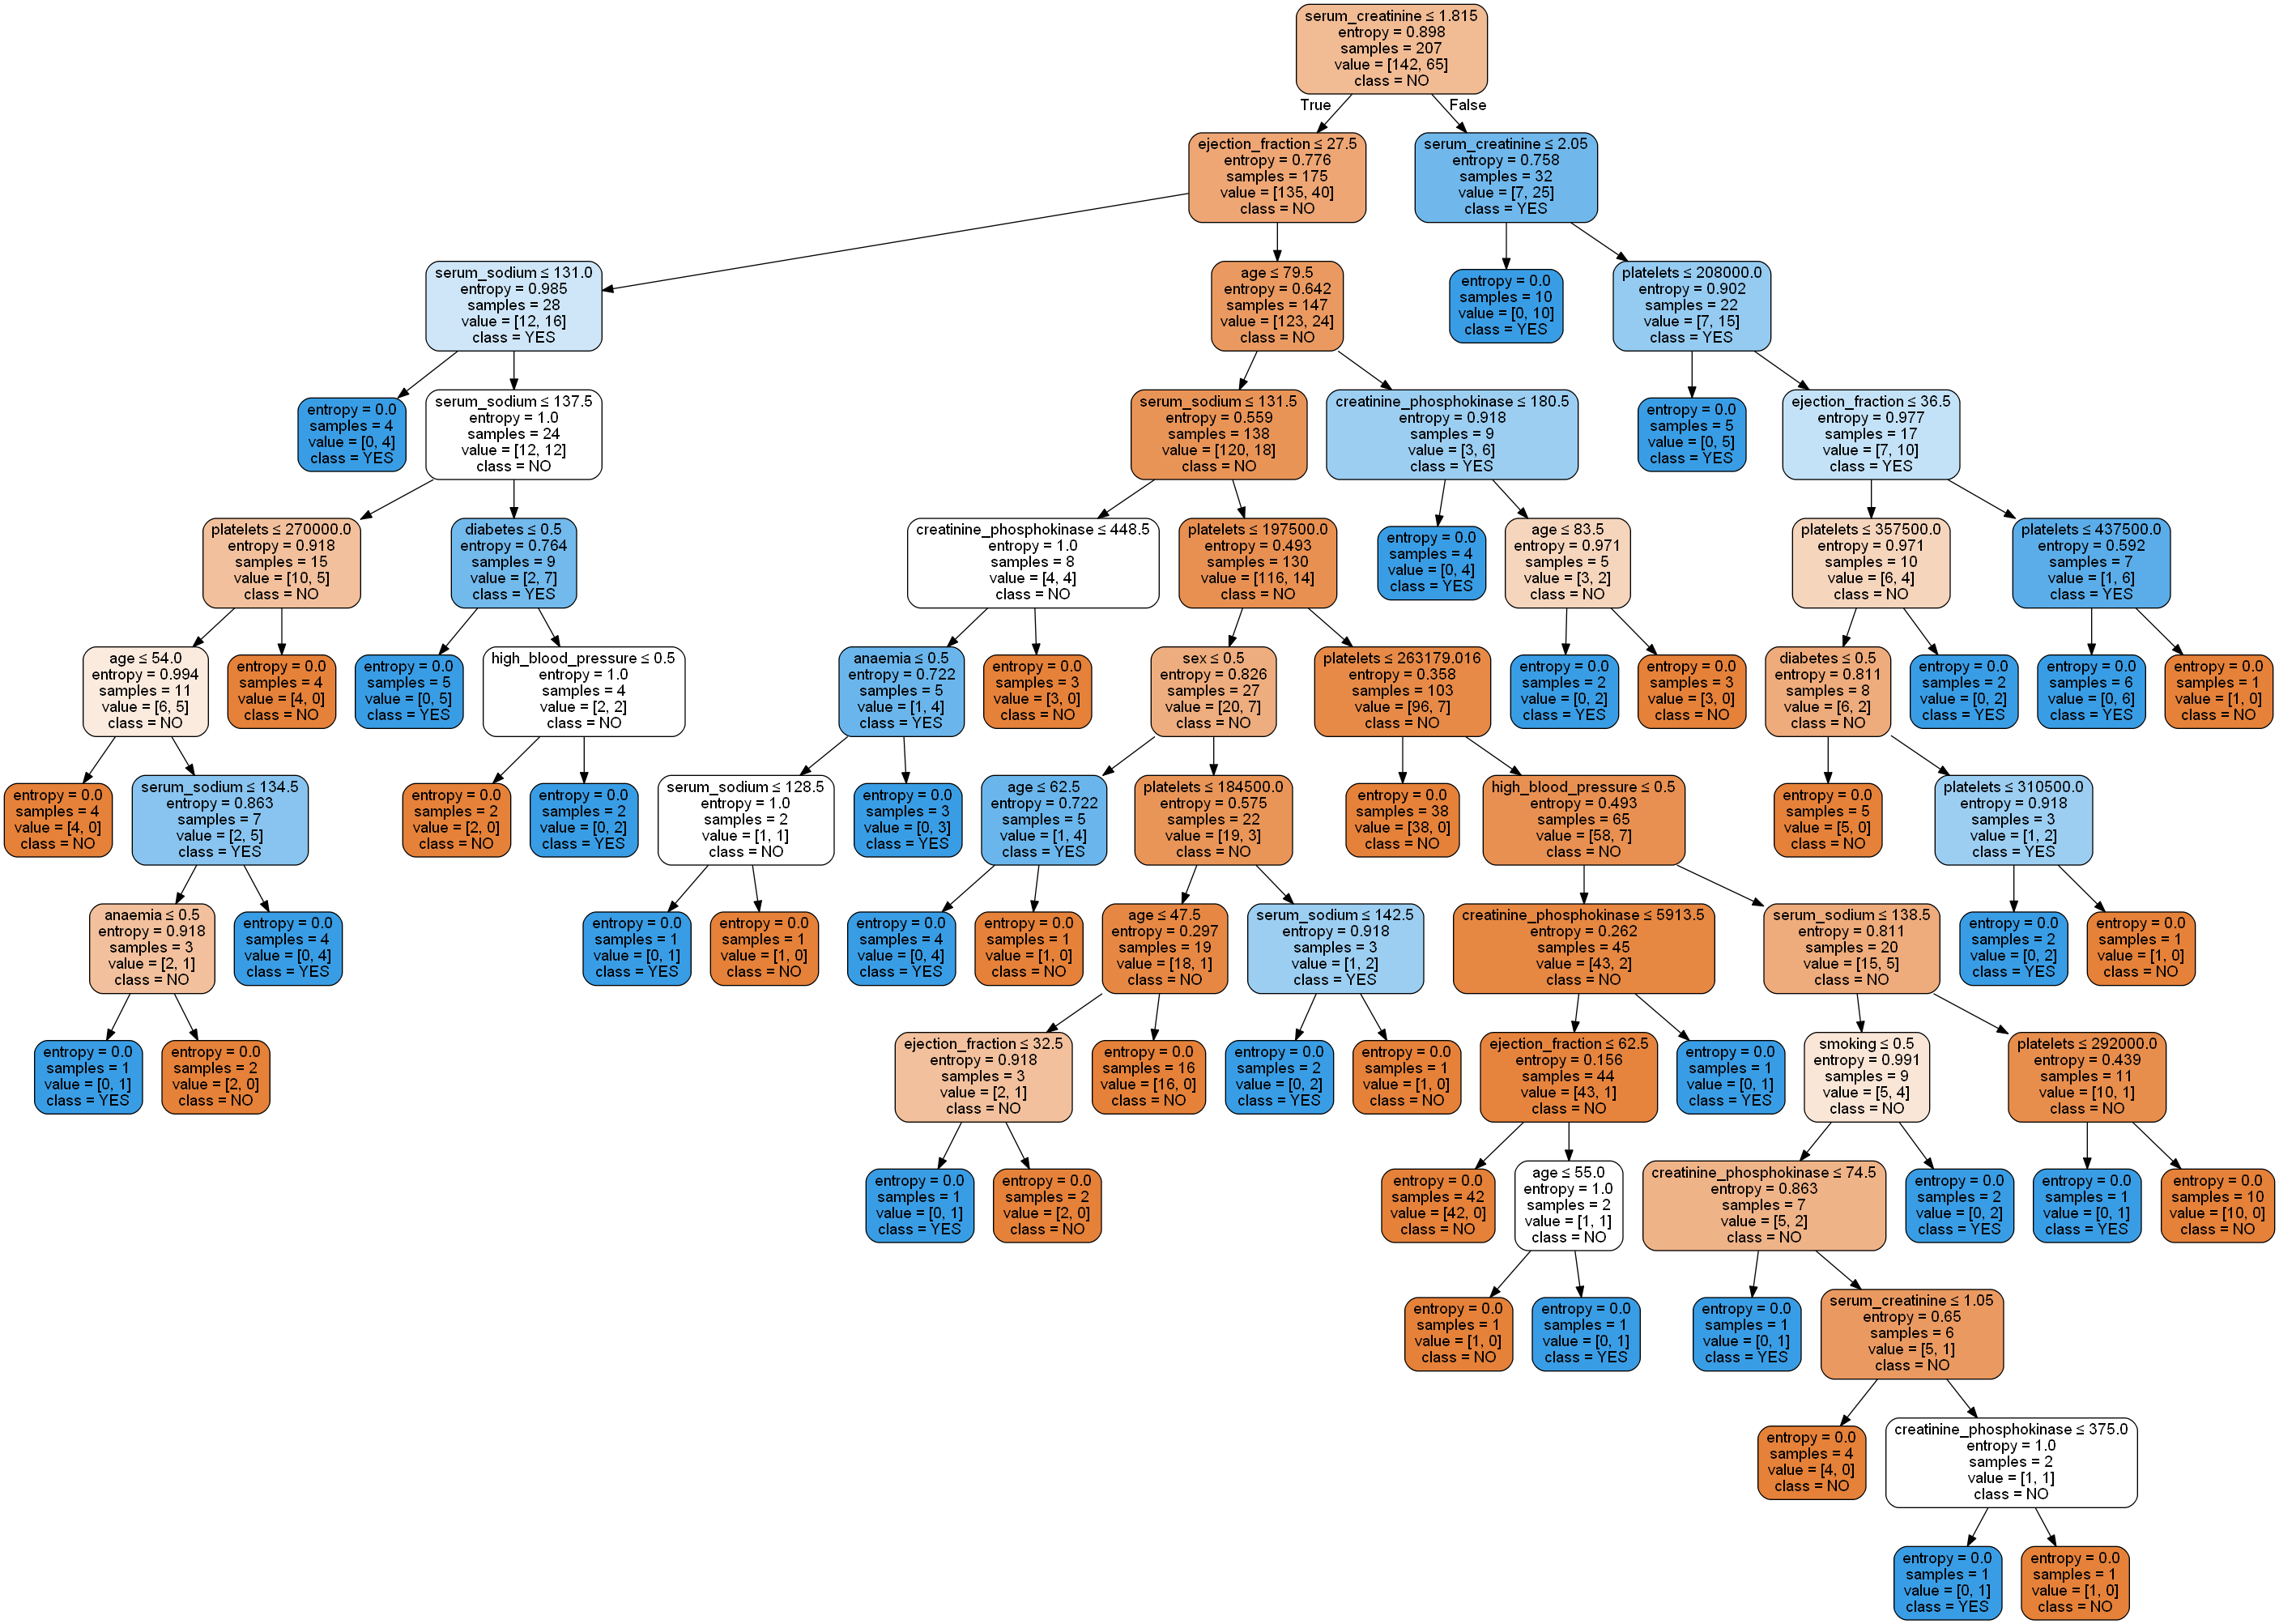

In [51]:
entr_model=tree.DecisionTreeClassifier(criterion='entropy')
entr_model.fit(X_train,y_train)
y_pred=entr_model.predict(X_test)
y_pred=pd.Series(y_pred)
dot_data = StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.6404494382022472
Balanced accuracy: 0.6442528735632184
Precision score for "Yes" 0.4634146341463415
Precision score for "No" 0.7916666666666666
Recall score for "Yes" 0.6551724137931034
Recall score for "No" 0.6333333333333333


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        60
           1       0.46      0.66      0.54        29

    accuracy                           0.64        89
   macro avg       0.63      0.64      0.62        89
weighted avg       0.68      0.64      0.65        89



In [ ]:
A simple decision tree

## 2. Entropy Model: Max Depth i

In [12]:
for i in range(1,9):
    entr_model2= tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    entr_model2.fit(X_train, y_train)
    y_pred = entr_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Entropy model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
    print('')

Model: Entropy model max depth 1
    Accuracy: 0.6966292134831461
    Balanced accuracy: 0.5879310344827586
    Precision score for "Yes" 0.5714285714285714
    Recall score for "No" 0.9

Model: Entropy model max depth 2
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.7014367816091953
    Precision score for "Yes" 0.6071428571428571
    Recall score for "No" 0.8166666666666667

Model: Entropy model max depth 3
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6485632183908046
    Precision score for "Yes" 0.631578947368421
    Recall score for "No" 0.8833333333333333

Model: Entropy model max depth 4
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.6658045977011494
    Precision score for "Yes" 0.65
    Recall score for "No" 0.8833333333333333

Model: Entropy model max depth 5
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6752873563218391
    Precision score for "Yes" 0.6
    Recall score for "No" 0.8333333333333334

Model: Entropy model max depth

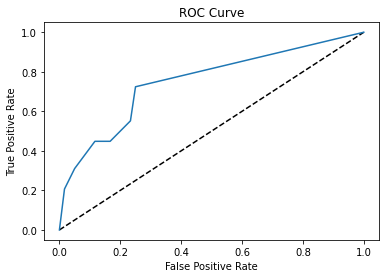

In [128]:
entr_model_final= tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
entr_model_final.fit(X_train, y_train)
y_pred = entr_model_final.predict(X_test)
y_pred = pd.Series(y_pred)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = entr_model_final.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

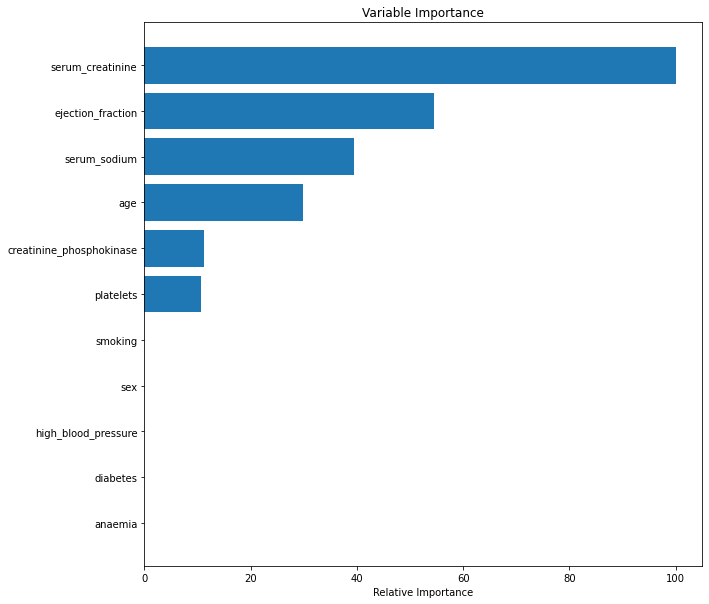

In [116]:
feature_importance = entr_model_final.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## 3. Gini Impurity Model: No Max Depth

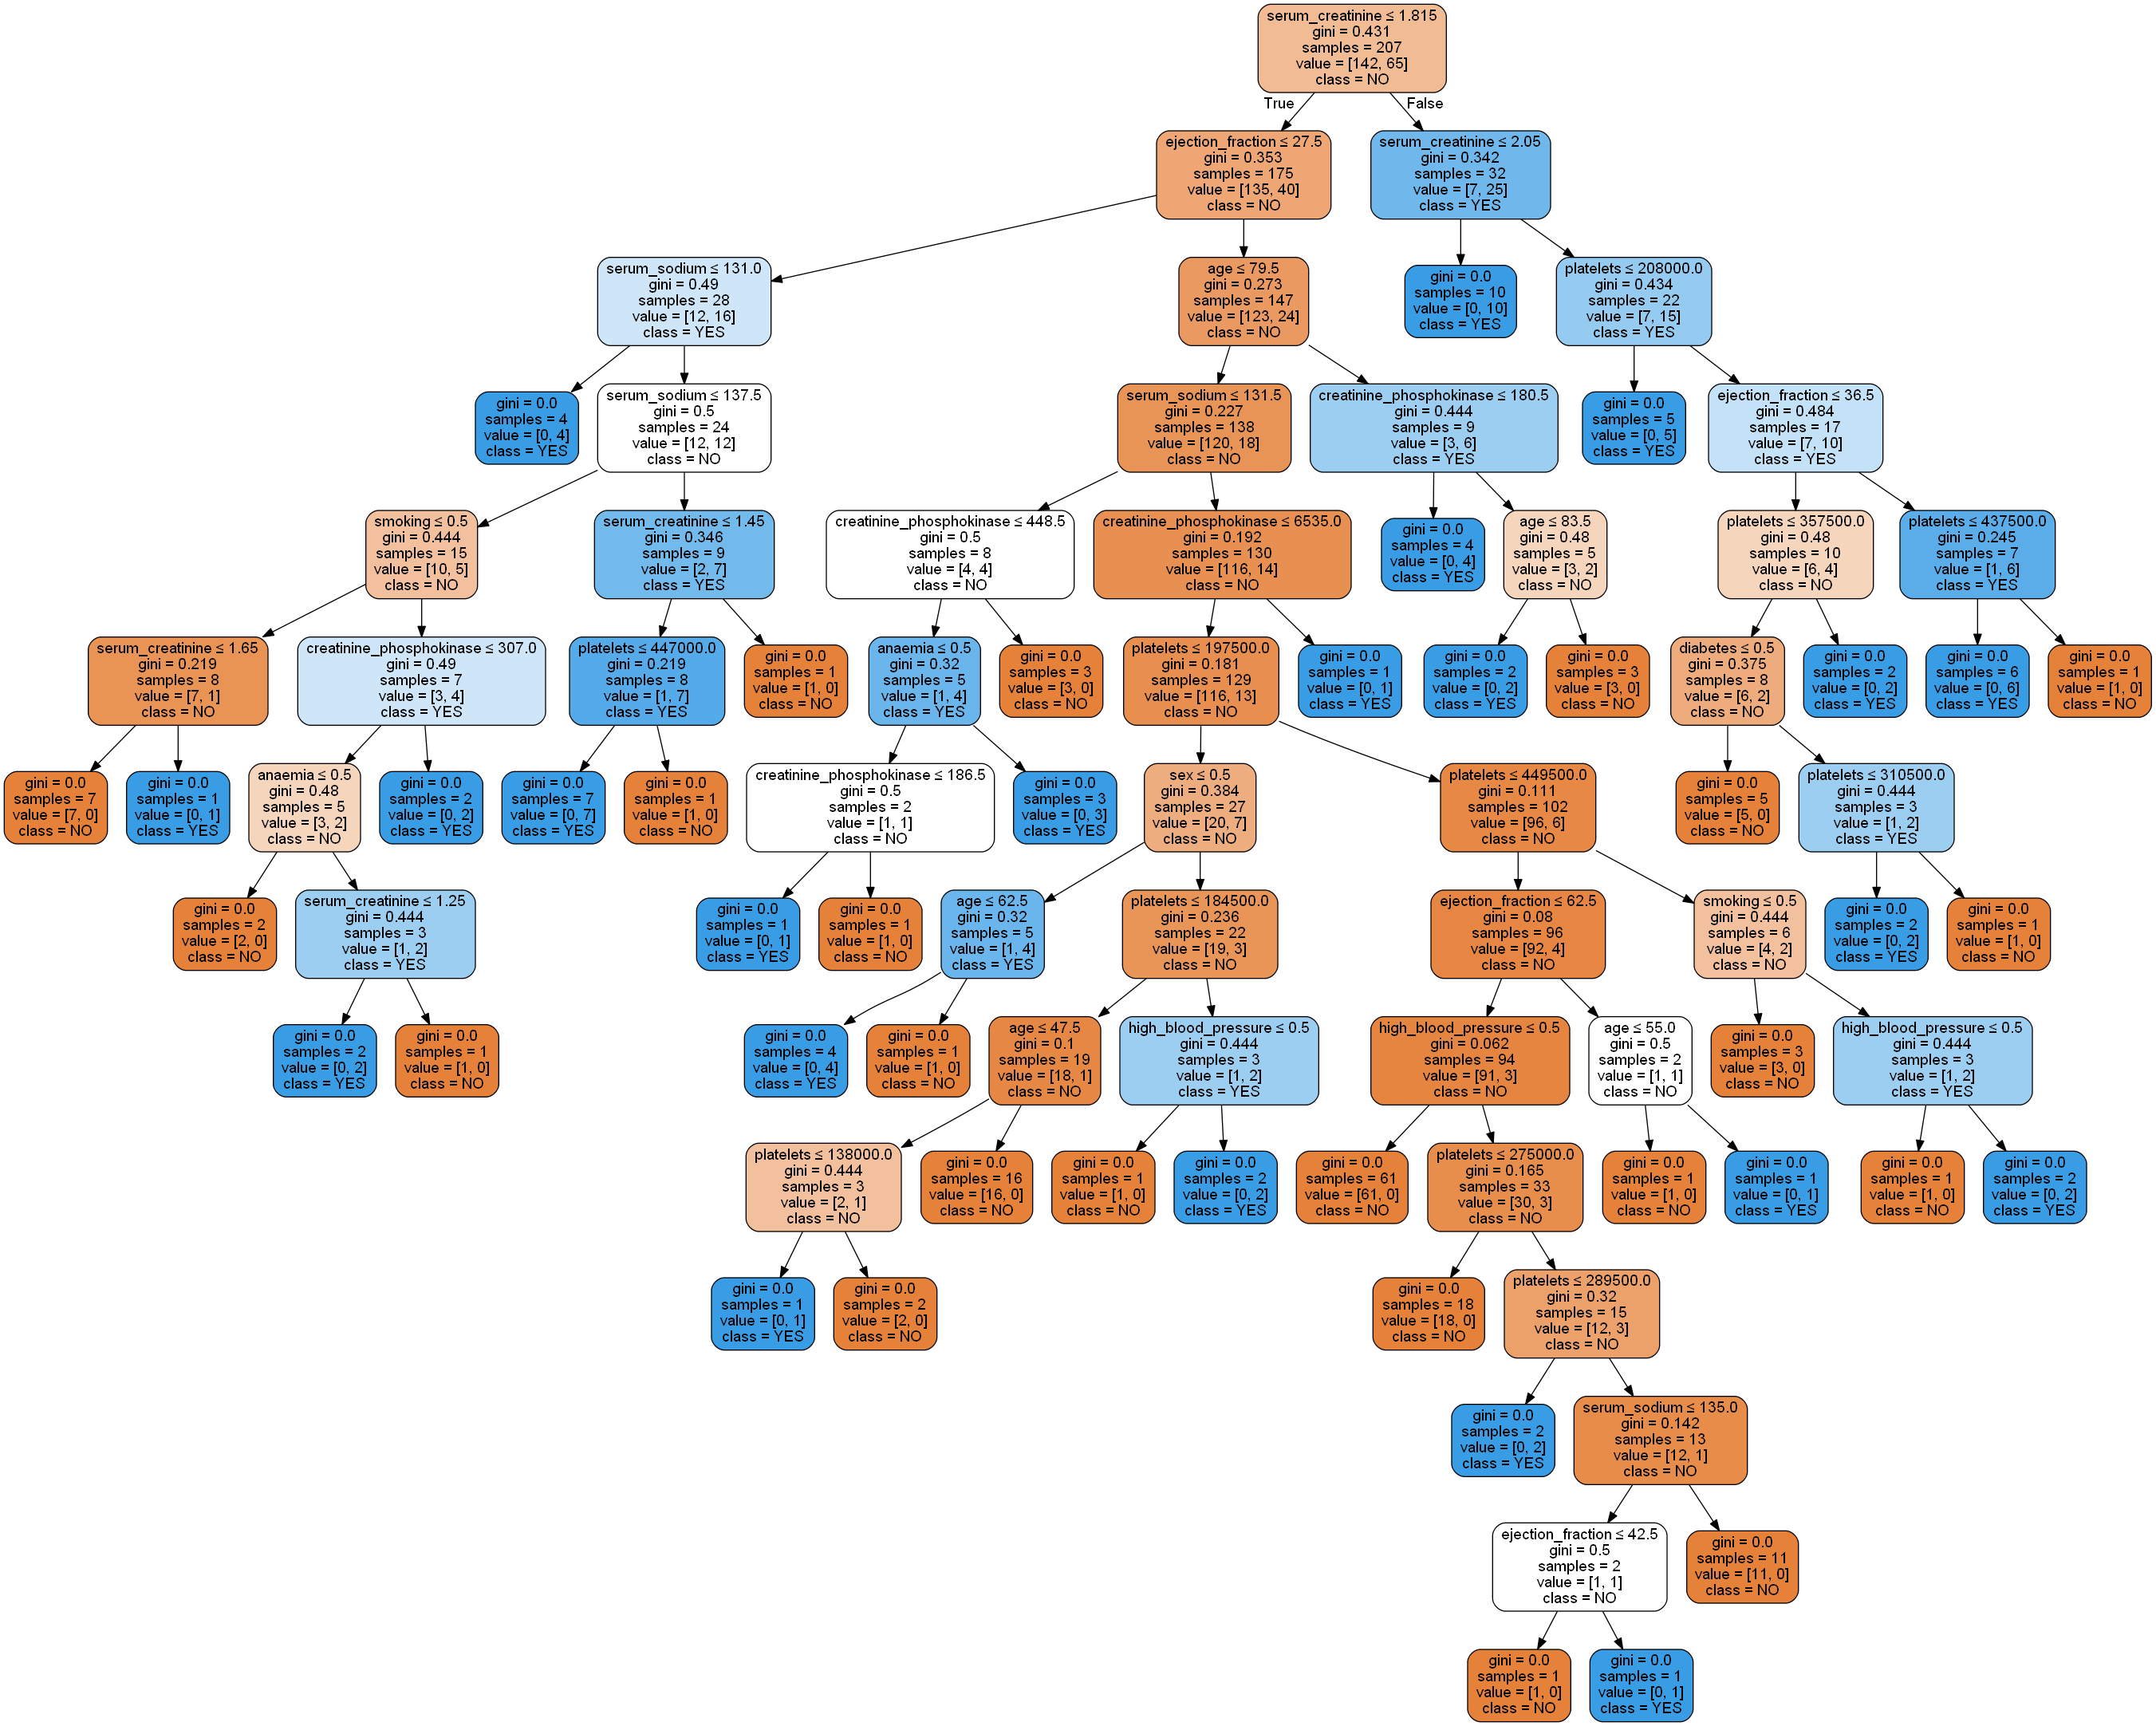

In [13]:
gini_model=tree.DecisionTreeClassifier(criterion='gini')
gini_model.fit(X_train,y_train)
y_pred=gini_model.predict(X_test)
y_pred=pd.Series(y_pred)
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
print("Model: Gini impurity model")
print("     Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("     Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print("     Precision score" , metrics.precision_score(y_test,y_pred, pos_label = 1))
print("     Recall score" , metrics.recall_score(y_test,y_pred, pos_label = 0))


Model: Gini impurity model
     Accuracy: 0.6853932584269663
     Balanced accuracy: 0.6597701149425287
     Precision score 0.5151515151515151
     Recall score 0.7333333333333333


## 4. Gini Impurity Model: Max Depth i

In [124]:
for i in range(1,9):
    gini_model2= tree.DecisionTreeClassifier(criterion="gini", max_depth = i)
    gini_model2.fit(X_train, y_train)
    y_pred = entr_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Gini model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model: Gini model max depth 1
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 2
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 3
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 4
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 5
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 6
    Accuracy: 0.6741573033707865
    Balanced accu

## Random Forest Model Using RandomSearchCV

In [179]:
RFModel=RandomForestClassifier()
param_grid = { 
    'criterion':['gini', 'entropy'],
    'n_estimators': [i for i in range(1,200)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(1,30)],
}
RandomCV_RFModel = RandomizedSearchCV(estimator=RFModel, param_distributions=param_grid, cv= 5)
RandomCV_RFModel.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                         

In [180]:
RandomCV_RFModel.best_params_

{'n_estimators': 165,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [181]:
RFModel=RandomForestClassifier(n_estimators=165,max_features='log2',max_depth=6,criterion='entropy')
RFModel.fit(X_train,y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)
print('"Model: Random Forest"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('    Confusion Matrix:',confusion_matrix(y_test,y_pred))

"Model: Random Forest"
    Accuracy: 0.7191011235955056
    f1-score= 0.703103086021448
    Balanced accuracy: 0.6402298850574712
    Precision score for "Yes" 0.6
    Recall score for "No" 0.8666666666666667
    Confusion Matrix: [[52  8]
 [17 12]]


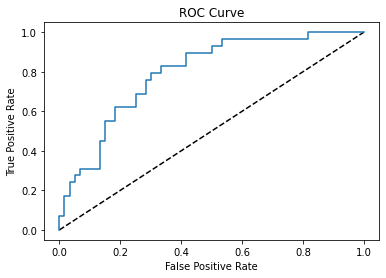

AUC Score: 0.6402298850574712


In [192]:
y_pred_prob = RFModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC Score:',auc(false_positive_rate, true_positive_rate))


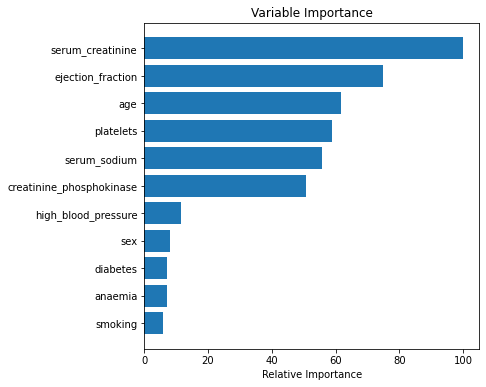

In [188]:
feature_importance = RFModel.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(6,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## 6. Extreme Gradient Boosting Model

In [18]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\juang\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    libxgboost-1.3.3           |       h0e60522_2         2.1 MB  conda-forge
    py-xgboost-1.3.3           |   py38haa244fe_2         124 KB  conda-forge
    xgboost-1.3.3              |   py38haa244fe_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/win-64::libxgboost-1.3.3-h0e60522_2
  py-xgboost         conda-forge/win-64::py-xgboost-1.3.3-py38haa244fe_2
  x

In [19]:
from xgboost import XGBClassifier

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgbpreds = xgb.predict(X_test)
print('"Model: XGBoost"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('    Confusion Matrix:',confusion_matrix(y_test,y_pred))

[21:01:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
"Model: XGBoost"
    Accuracy: 0.6853932584269663
    f1-score= 0.6901176088287859
    Balanced accuracy: 0.6597701149425287
    Precision score for "Yes" 0.5151515151515151
    Recall score for "No" 0.7333333333333333
    Confusion Matrix: [[44 16]
 [12 17]]


In [33]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [42]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [43]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.6741573033707865                                     
SCORE:                                                 
0.6741573033707865                                                                
SCORE:                                                                            
0.6741573033707865                                                                
SCORE:                                                                            
0.6741573033707865                                                                
SCORE:                                                                            
0.6741573033707865                                                                
SCORE:                                                                            
0.6741573033707865                                                                
SCORE:                                                                            
0.

SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                          

0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
SCORE:                                                                             
0.6741573033707865                                                                 
100%|██████████| 100/100 [00:05<00:00, 18.99trial/s, best loss: -0.6741573033707865]


In [44]:
print(best_hyperparams)

{'colsample_bytree': 0.7379098870759719, 'gamma': 5.58452027486249, 'max_depth': 12.0, 'min_child_weight': 8.0, 'reg_alpha': 132.0, 'reg_lambda': 0.5553272511371768}


In [48]:
xgb=XGBClassifier(colsample_bytree= 0.6655392754230048, gamma= 4.198875359789924, max_depth= 17, min_child_weight= 1.0, reg_alpha= 57.0, reg_lambda= 0.896332305739873)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_pred=pd.Series(y_pred)
print('"Model: XGBoost"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('    Confusion Matrix:',confusion_matrix(y_test,y_pred))

[21:07:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
"Model: XGBoost"
    Accuracy: 0.6741573033707865
    f1-score= 0.5429454792247945
    Balanced accuracy: 0.5
    Precision score for "Yes" 0.0
    Recall score for "No" 1.0
    Confusion Matrix: [[60  0]
 [29  0]]


C:\Users\juang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
